In [10]:
import numpy as np
import torch 
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [3]:
train_set = datasets.MNIST('MNIST_data/trainset', download=True, train=True, transform=transform)
val_set = datasets.MNIST('MNIST_data/testset', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)


100.0%


Extracting MNIST_data/trainset/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/trainset/MNIST/raw



100.0%


Extracting MNIST_data/trainset/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/trainset/MNIST/raw



100.0%


Extracting MNIST_data/trainset/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/trainset/MNIST/raw



100.0%


Extracting MNIST_data/trainset/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/trainset/MNIST/raw



100.0%


Extracting MNIST_data/testset/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/testset/MNIST/raw



100.0%


Extracting MNIST_data/testset/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/testset/MNIST/raw



100.0%


Extracting MNIST_data/testset/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/testset/MNIST/raw



100.0%

Extracting MNIST_data/testset/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/testset/MNIST/raw



In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


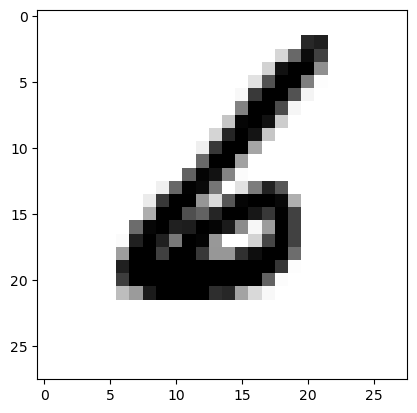

In [11]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');